# Introduction

In this notebook, we randomly generate an ensemble of potentials to be used in solving Schrodinger's equaiton.

Each potential is generated as Fourier series:
$$ V(x) = \sum\limits_{n=0}^{n_{\rm max}}\left[ V_n^C \cos(n\pi x) +  V_n^S \sin(n\pi x)\right] $$
where the coefficients $\{V_n^{C/S} \,\,|\,\, n \in [1,n_{\rm max}]\}$ are random numbers drawn from a specified probability distribution.

We model the probability distributions for each $V_n^{C/S}$ as a gaussian with zero mean and variance 
$$ \langle {V_n^{C/S}}^2 \rangle = \langle{V_0^{C/S}}^2\rangle e^{-\lambda n} $$
In this way we bias sampled functions toward those with fewer modes. The parameter $\lambda$ controlls the number of modes that contribute to the function space. We note that to represent the function space with the variance specified by $\lambda$, we must have $n_{\rm max} \gg 1/\lambda$.

Created by Hudson Smith on 2016-06-28.
Copyright (c) 2016 ACT. All rights reserved.

# Preliminaries

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import normal, randint
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import legval
import pprint

# Number of potentials:
NV = int(1E6)
# Number of basis states:
NB = 10
ns = np.arange(1, NB+1)
# lambda (variance of Legendre coefficients):
lam = 0.75
# The variance of the n=0 legendre coefficient V_0:
V20 = 10

# Output file:
filepath = "../Data/potentials_NV" + str(NV) + "_NB" + str(NB) + "_lam" + str(lam) + "_V20" + str(V20)

# Mode variances

In [2]:
def modeVariance(n, lam, V20):
    return V20 * np.exp(-lam*(n-1))

print(modeVariance(0, 0.1, 1))
print(modeVariance(np.arange(0,10),0.1,1))

1.10517091808
[ 1.10517092  1.          0.90483742  0.81873075  0.74081822  0.67032005
  0.60653066  0.54881164  0.4965853   0.44932896]


In [3]:
V2ns = modeVariance(ns, lam, V20)

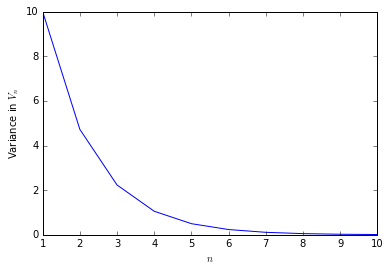

In [4]:
plt.clf()
plt.plot(ns, V2ns)
plt.xlabel("$n$")
plt.ylabel("Variance in $V_n$")
plt.show()

# Generate random numbers
We generate a matrix of numbers. The rows correspond to different random potentials, and the columns correspond to the the coefficients $V_n^{C/S}$ of the Fourier series. After generating the potential coefficients, we plot a histogram of the distribution for a few different values of $V_n^{C/S}$.

In [5]:
stddevs = np.sqrt(V2ns)
VCns = normal(0,stddevs, size = (NV, NB))
VSns = normal(0,stddevs, size = (NV, NB))

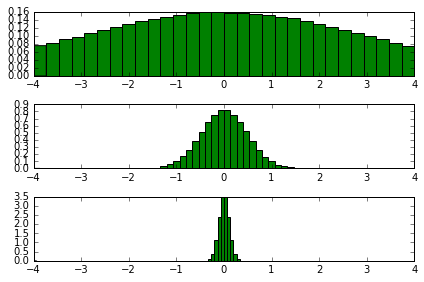

In [6]:
fig, axes = plt.subplots(nrows = 3, ncols = 1)
ax0,ax1,ax2 = axes.flat

nbins = 30
ax0.hist(VCns[::,0], nbins, normed = 1, facecolor = 'green', alpha = 1, range = [-4,4])
ax1.hist(VCns[::,5], 2*nbins, normed = 1, facecolor = 'green', alpha = 1, range = [-4,4])
ax2.hist(VCns[::,9], 4*nbins, normed = 1, facecolor = 'green', alpha = 1, range = [-4,4])

plt.tight_layout()
plt.show()

# Fourier Series
We calculate the values of the Sine and Cosine function in the Fourier expansion for a grid of $x$-values and for each value of $n$ in our truncated Fourier basis. We do this separately for Sine and Cosine. Letting the number of $x$ grid points be $N_x$, the result is two $N_B\times N_x$ dimensional matrices. One corresponding to the values of the Sine functions, and one corresponding the values of the Cosine functions.

In [7]:
def VS(ns, xs):
    return np.sin(np.pi*np.outer(ns,xs))
def VC(ns, xs):
    return np.cos(np.pi*np.outer(ns,xs))

pprint.pprint(VS((1,2,5), (-0.35, 0.81)))
pprint.pprint(VC((1,2,5), (-0.35, 0.81)))

array([[-0.89100652,  0.56208338],
       [-0.80901699, -0.92977649],
       [ 0.70710678,  0.15643447]])
array([[ 0.4539905 , -0.82708057],
       [-0.58778525,  0.36812455],
       [ 0.70710678,  0.98768834]])


# Plotting the potentials

In [8]:
Nx = 100
xs = np.linspace(-1,1,100)
#Vgrid = legval(xs, np.transpose(Vns))
VSs = VS(ns,xs)
VCs = VC(ns,xs)

Vgrid = np.dot(VSns,VSs) + np.dot(VCns,VCs)

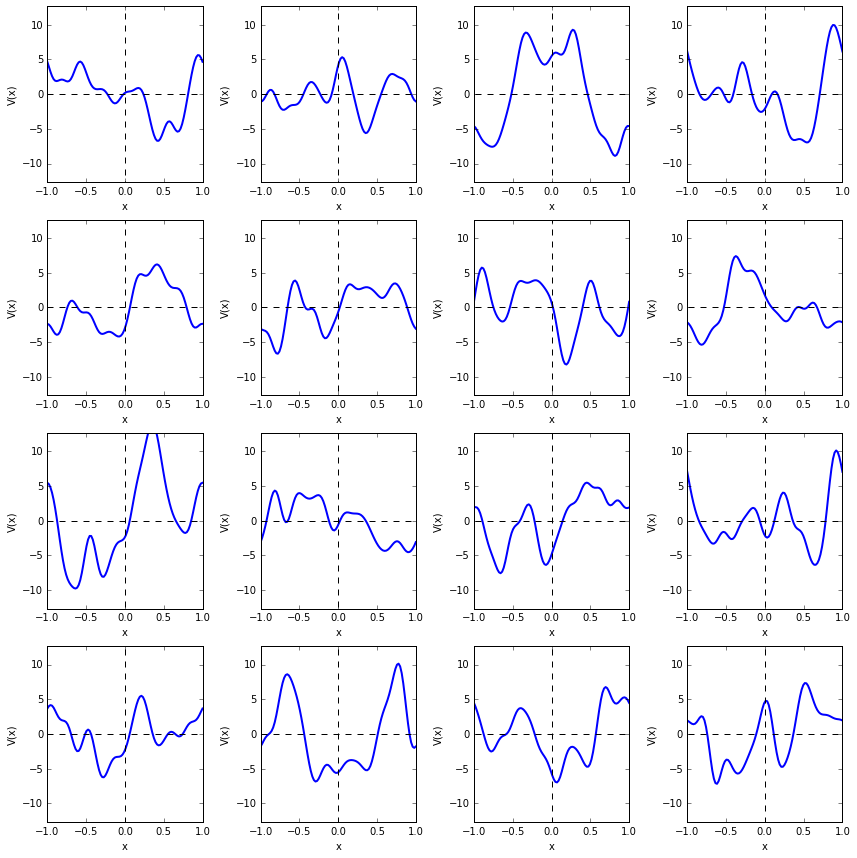

In [9]:
nrows = 4
ncols = 4
nplot = nrows * ncols
Vints = randint(0,NV, nplot)
Vplot = Vgrid[Vints,::]

plt.clf()
fig, axes = plt.subplots(nrows = nrows, ncols = ncols)
fig.set_size_inches(3*ncols,3*nrows)
subax = axes.flat

for i in range(0,nplot):
        subax[i].plot(xs, Vplot[i], linewidth = 2)
        subax[i].axhline(y=0,xmin=-1,xmax=1, linestyle='dashed' ,color = 'k')
        subax[i].axvline(x=0,ymin=-10,ymax=10, linestyle='dashed' ,color = 'k')
        subax[i].set_xlabel("x")
        subax[i].set_ylabel("V(x)")
        subax[i].set_ylim((-4*np.sqrt(V20),4*np.sqrt(V20)))

plt.tight_layout()
plt.show()

# Data export

In [10]:
Vns = np.asarray([VSns,VCns])
print(np.shape(Vns))
np.save(filepath, Vns)

(2, 1000000, 10)
